# Gentle Intro to SVMs 
<img style="float: right;" src="./SVM_cover.png" width="300">

## Topics/Organization: 
* Some geometric intuition for SVMs
* Introducing slack variables (Soft-Margin SVMs)
* The SVM loss function (primal and dual forms) 
* SVMs and Kernels 
* Some coding examples of the above (for fun!)


## Some Geometric Intuition for SVMs
**Support Vector Machines (SVMs)** are a class of non-deep learning ML algorithm that can be used for both classification and regression problems. SVMs are extremelly powerful (we will see why!) and were considered top performing during early 1990s-2000s. <br/>
Main idea behind SVMs is that if we have some p-dimensional data (i.e., $\mathbf{X} \in \mathbb{R}^p, \; Y \in \{1, -1\}$), SVMs try to find the $n-1$ dimensional hyperplane that best separates the two classes. <br/> 
Best here is in the sense that this is the hyperplane that maximizes the margins (i.e., distances) between the closest points in the positive/negative classes and the decision boundary. That is why these models are often called _wide margin classifiers_. <br/>
But, why is maximizing these margins better? 
1) Avoid overfitting <br/>
2) This reduces generalization error <br/>
<br/>
Let's illustrate the above with some schematics... <br/>
<br/>
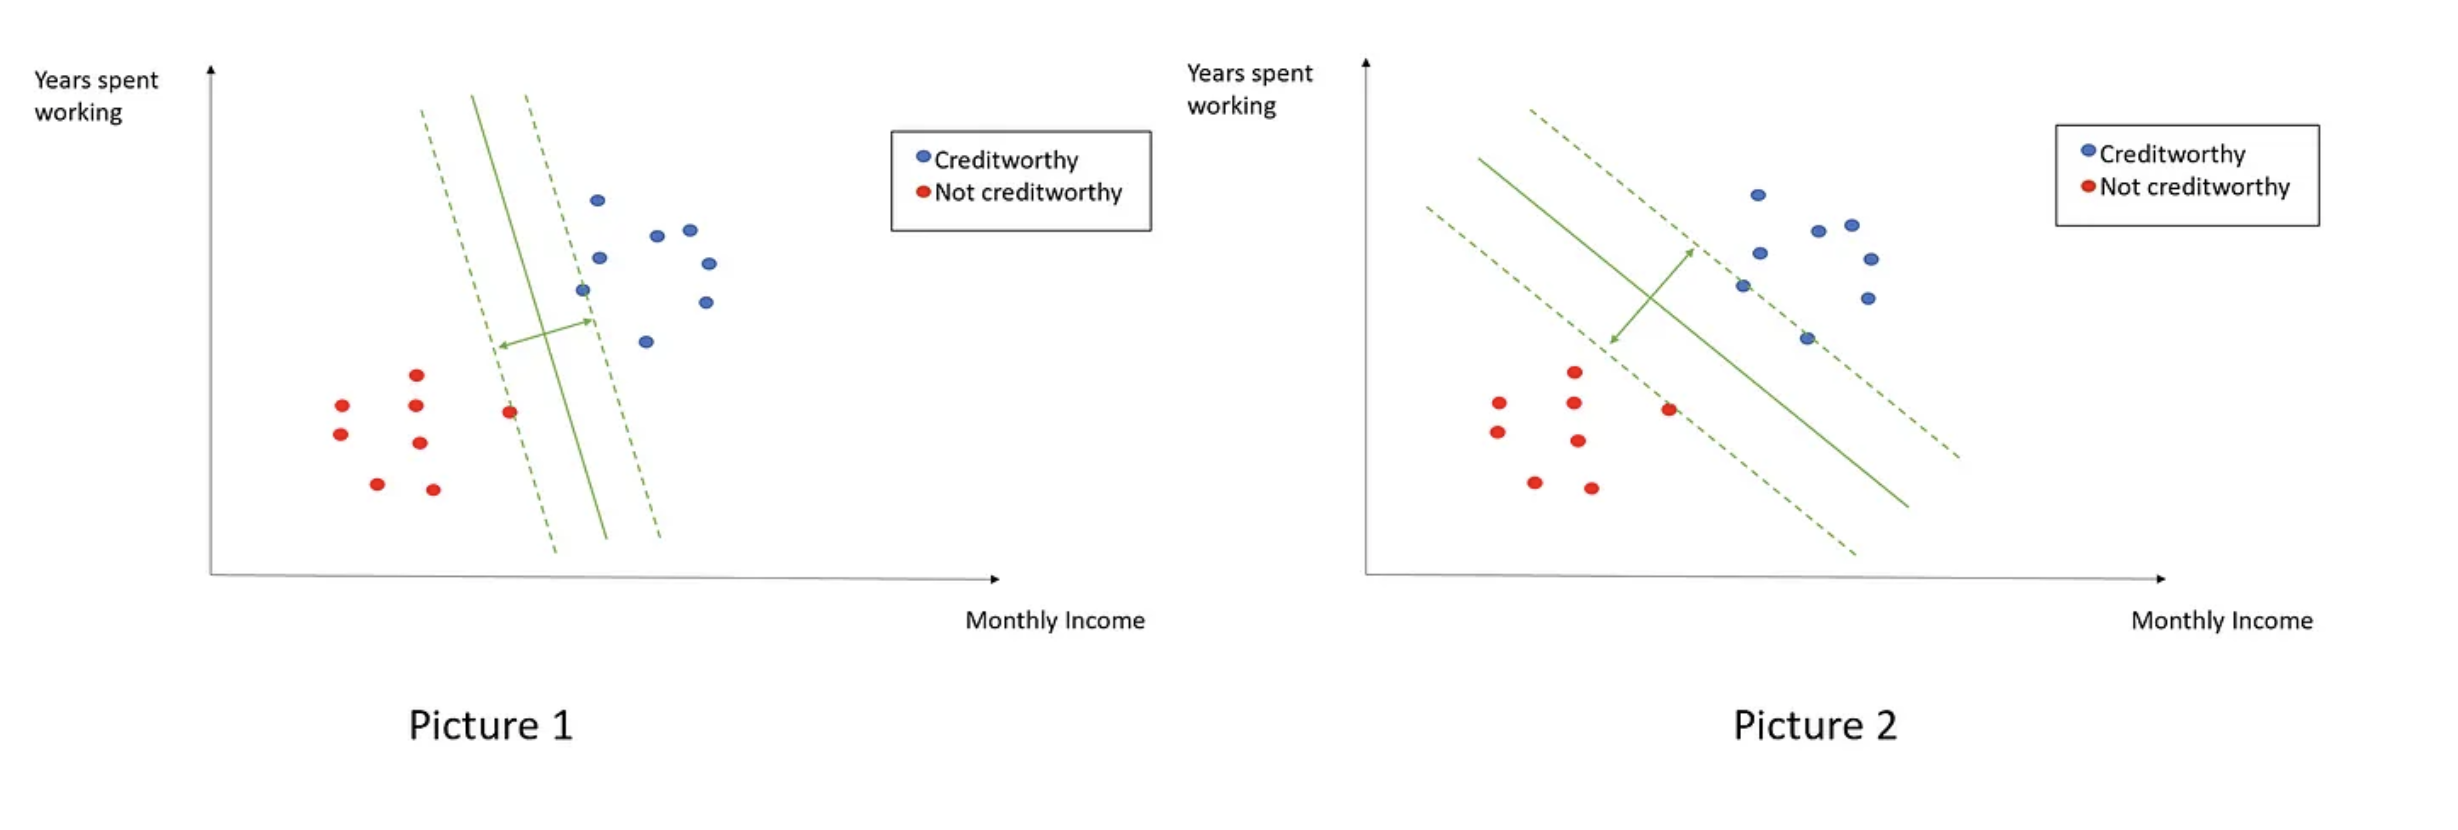
<br/>
Ok, now let's try to write this same intuition using some equations! Begin by considering the equations for the positive and negative (class) planes: <br/>
<br/>
$\mathbf{W^\top X_{pos}} + b = 1$ <br/>
$\mathbf{W^\top X_{neg}} + b = -1$ <br/>
<br/>
Now, subtract these two and divide result by the $L_2$ norm of $\mathbf{W}$:
<br/>
<br/>
$\frac{\mathbf{W^\top(X_{pos} - X_{neg})}}{\lVert \mathbf{W} \rVert} = \frac{2}{\lVert \mathbf{W} \rVert}$
<br/>
<br/>
Note that the LHS is essentially the distance between the positive and negative class hyperplanes, which is exactly what we said we wanted to maximize... Therefore, the optimization problem we are trying to solve is: <br/>
<br/>
$ \text{argmax}\left(\frac{2}{\lVert \mathbf{W} \rVert} \right) \forall i  \; \text{s.t.} \; Y_i(\mathbf{W^\top \cdot X_i} + b) \geq 1$ <br/>
<br/>
<br/>
Note that, in the above the constraint $Y_i(\mathbf{W^\top \cdot X_i} + b) \geq 1$ comes from the assumption that our data are linearly separable -- this is the so-called _Hard-margin_ SVM. <br>

## Soft-Margin SVMs and Slack variables 
Well, but most real data out there are not linearly separable at all.... So, we need an SVM framework that can deal with these cases. To do so, let's re-write the original SVM objective as follows: <br/>
<br/>
$ \text{argmin}\left(\frac{\lVert \mathbf{W} \rVert}{2} \right) + C \frac{1}{n} \sum_{i=1}^n \xi_i$ <br/>
<br/>
Note that we swapped the original $\text{argmax}$ problem for its corresponding $\text{argmin}$ one and added an additional penalty/loss term $C \frac{1}{n} \sum_{i=1}^n \xi_i$, where $C$ is a tunnable hyper-parameter and $\xi$ represents the distance of misclassified points from their actual/correct plane. Let's look at an example here: <br/>
<br/>
<img src="./SoftMargin_SVM_ex.png" width="400">
<br/>
In the above, the distance between $x_1$ and the plane $\pi$ is 0.5 towards the negative plane. That is: <br/>
$Y(\mathbf{W^\top X} + b) = -0.5$ <br/>
$Y(\mathbf{W^\top X} + b) = 1 - 1.5$ <br/>
$Y(\mathbf{W^\top X} + b) = 1 - \xi$ <br/>
This shows that $\xi$ is truly the distance of the misclassified point to its actual plane (in this case $\pi^+$). $\xi$ is also known as a slack variable! <br/>
And the hyper-parameter $C$ represents how strongly we penalize our model for violating our margins and misclassiying points. Therefore, as $C$ increases, our model will tend to overfit the data, and vice-versa. <br/> 

## The SVM Loss
### Primal Form 
Looking at the Soft-Margin SVM objective, we can guess (intuitively) that we will want to minimize this distance of misclassified points from their true/correct plane (i.e., we wish to minimize our slack variable, $\xi$). In the case of SVMs, this is done through what we call a _hinge loss_ mechanism. Let's dive into it! <br/>
Starting with the last equation from above, we can write: <br/>
$1 - Y(\mathbf{W^\top X} + b) = \xi$ <br/>
Now let $Y(\mathbf{W^\top X} + b) = Z$ and note that if $Z \geq 1$ then the point is correctly classified and, conversely, if $Z < 1$, then the point is misclassified. Using this definition for $Z$, we can re-write the above as: <br/>
$1 - Z = \xi$ <br/>
Now, hinge losses are functions with the following property - their values are non-zero until a certain point after which they are equal to zero. SVMs optimize a hinge loss of the form: <br/>
$\mathcal{L}_H = \text{Max}(0, 1-Z)$ <br/>
Let's see how this behaves... Well, if $Z\geq1$ (i.e., pt is correctly classified), then $\text{Max}(0, 1-Z) = 0$. That is, our loss is zero. On the other hand, if $Z \leq 1$ (i.e., we misclassified pt) then $\text{Max}(0, 1-Z) = 1-Z$. That is, we get some positive loss. Great, this is exactly what we want (look back at the Soft-Margin SVM objective again)!
### Dual Form 
Of note, the Soft-Margin SVM objective we've been discussing -  $\text{argmin}\left(\frac{\lVert \mathbf{W} \rVert}{2} \right) + C \frac{1}{n} \sum_{i=1}^n \xi_i$ - can be written in the following, mathematically equivalent form: <br/>
<br/>
$\text{Max} \left\{ \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^\top x_j \right \}$ <br/>
<br/>
This is called the _dual form_ and corresponds what's called in convex optimization theory the _dual problem_. Proving that these are equivalent formally would require me to explain a good chunk of convex optimization theory and is quite involved -- so I decided not to that today! But if you are curious about it, here are some excellent reads on it: <br/>
* [Convex_Optim_Notes](https://users.cs.duke.edu/~cynthia/CourseNotes/ConvexOptimizationDukeVersion.pdf) - these are Cynthia Rudin's notes on topic (awesome, but technically dense!)
* [Deriving_SVM_Dual](https://users.cs.duke.edu/~cynthia/CourseNotes/SVM.pdf) - also from Cynthia Rudin. Explains/derives above dual form in detail for SVMs.
* [YouTube Lecture SVMs](https://youtu.be/_PwhiWxHK8o) - starting at 30mins, when he derives dual form.

## SVMs and Kernels 
Well, the reason I bothered showing you the _dual form_ above is because it helps us see why SVMs are considered to be _kernel based methods_ and is what makes them so powerful. But before we dive into that, a couple of points ... 

### What is a kernel?
Kernel can mean many different things in math, BUT here we are specifically considering **Mercer Kernels**, that is, symmetric positive definite kernels. <br/>
More specifically, a Mercer kernel is any **symmetric** function $\mathcal{K} : \mathcal{X} \times \mathcal{X} \to \mathbb{R}^{+}$, s.t.: <br/>
<br/>
$\sum_{i=1}^N \sum_{j=1}^N \mathcal{K} (\mathbf{x}_i, \mathbf{x}_j) c_i c_j \geq 0$ <br/>
<br/>
with equality iff $c_i=0 \, \forall i$. Put it another way, if I give you $N$ data points and a Mercer kernel $\mathcal{K}(., .)$, we can defined a Gram matrix: <br/>
<br/>
$\mathbf{K} = \left[ 
\begin{array}{ccc}
\mathcal{K}(\mathbf{x}_1, \mathbf{x}_1) & \cdots & \mathcal{K}(\mathbf{x}_1, \mathbf{x}_N) \\
 & \vdots & \\
\mathcal{K}(\mathbf{x}_N, \mathbf{x}_1) & \cdots & \mathcal{K}(\mathbf{x}_N, \mathbf{x}_N) 
\end{array}
\right]$ <br/>
<br/>
which has to be symmetric and positive definite for any set of distinct inputs. There are many, many times of Mercer kernels - for a quick reference on these, check out the [kernel_cookbook](https://www.cs.toronto.edu/~duvenaud/cookbook/). <br/>

**Some (popular) examples of valid kernels**
- Linear Kernel $k(x,y) = x^Ty$ 

- Polynomial Kernel $k(x,y) = (\gamma x^Ty + c_0)^d$ 
    - d is the polynomial degree
    
- RBF Kernel $k(x,y) = \exp({\frac{-\lVert x - y \rVert^2}{2\sigma^2}})$
    - Called Gaussian if $y = \bar{x}$
    - $\sigma$ influences tightness of fit, as you can imagine, a low $\sigma$ will induce overfitting
    

### How can we construct valid kernels from existing ones?
##### This is NOT an exhaustive list btw! 
* $k(x,x') = ck_1(x,x')$, where $ c > 0 $ is a constant and $k_1(x,x')$ is a known valid kernel
* $k(x,x') = f(x)k_1(x,x')f(x')$ where $f$ is any function
* $k(x,x') = q(k_1(x,x'))$ where $q$ is a polynomial with nonnegative coefficients
* $k(x,x') = \exp(k_1(x,x'))$
* $k(x,x') = k_1(x,x') + k_2(x,x')$ where $k_1$ and $k_2$ are both known valid kernels
* $k(x,x') = k_1(x,x')k_2(x,x')$
* $k(x,x') = x^TAx$, where $A$ is a symmetric positive semidefinite matrix

### The Kernel Trick 
Oftentimes, we wish to work with datasets that aren't linearly seperable in one dimensional space, so it can be helpful to use a mapping function $\Phi(x)$ to a higher dimensional space where the data are linearly separable. This trategy is known as **the kernel trick**.  The mathematical details of why this is true are beyond the scope of this presentation, but they related to the so-called Mercer's theorem. If you are curious about it, Kevin Murphy's Probabilistic ML book offers a great explanation on it! 
* Murphy's Probabilistic ML Book, check chapter 18 - [prob_ML_book](https://probml.github.io/pml-book/book2.html)

<img src="./Kernel_Trick_Schematic.png" width="400">

### Tying it all back 
In the _dual form_ I presented before $\text{Max} \left\{ \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^\top x_j \right \}$ , note that we are taking the inner(i.e.,dot) product of $x_i$ and $x_j$. We can replace this inner product by a valid kernel (which preserves inner products!) and all else works as desired! That is, we can more generally write: <br/>
$\text{Max} \left\{ \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j) \right \}$ <br/>
where $K(x_i, x_j)$ is any valid _Mercer Kernel_. That is, we can apply the kernel trick here to be able to separate our data better, even if it is not linearly separable (in its ambient/original dimensional space).

## Coding Examples 
Let's look at a linearly separable case first. For this, am working with some toy data generared as follows: <br/>
* X_{neg} $\sim$ $\mathcal{N}$([-5, -5], 5*$I_2$) and correspond to negative labels (-1)
* X_{pos} $\sim$ $\mathcal{N}$([5, 5], 5*$I_2$) and correspond to positive labels (+1) 
Then, I use  [libsvm](https://github.com/cjlin1/libsvm) (an existing implementation of SVMs)to fit an SVM to these data and highlight our supporting vectors (SVs). <br/>
Finally, I vary the value of the hyperparameter $C$ and plot the different decision boundaries achieved, as well as the number of SVs by C vals (in log scale). 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import libsvm
from libsvm.svmutil import *
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

%matplotlib inline

*****************************************
optimization finished, #iter = 10

Slope of the hyperplane is :
[[0.36172799]
 [0.22875099]]
Intercept of hyperplane is:
-0.22133232278883996
****************************************
nu = 0.001832
obj = -0.091576, rho = 0.221332
nSV = 3, nBSV = 0
Total nSV = 3


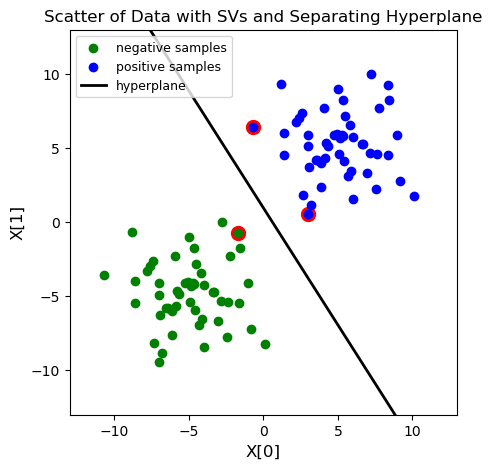

In [10]:
#gen data
X_neg = multivariate_normal.rvs(mean=[-5, -5], cov=(5*np.eye(2)), \
                                  size=50, random_state=np.random.seed(0))
X_pos = multivariate_normal.rvs(mean=[5, 5], cov=(5*np.eye(2)), \
                                  size=50, random_state=np.random.seed(0))

X = np.concatenate([X_neg, X_pos], axis=0)
neg_labels = np.repeat(-1, 50)
pos_labels = np.repeat(1, 50)
Y = np.concatenate([neg_labels, pos_labels], axis=0)

#set up our SVM problem and train 
prob = svm_problem(Y, X)
options = svm_parameter('-s 0 -t 0') #linear kernel, C type 
model = svm_train(prob, options)

#Compute the slope and intercept of the separating line/hyperplanee 
w = np.matmul(X[np.array(model.get_sv_indices()) - 1].T, model.get_sv_coef())
b = -model.rho.contents.value

#report slope and intercept vals 
print('*'*40)
print('Slope of the hyperplane is :')
print(w)
print('Intercept of hyperplane is:')
print(b)
print('*'*40)

# Draw the scatter plot, the decision boundary line, and mark the support vectors.
plt.figure(figsize=(5,5))
for i in model.get_sv_indices():
    plt.scatter(X[i - 1][0], X[i - 1][1], color='red', s=100)
plt.scatter(X[:50, 0], X[:50, 1], color='green', label='negative samples')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', label='positive samples')
plt.plot([-10, 10], [-(-10 * w[0] + b) / w[1], -(10 * w[0] + b) / w[1]], color='black', \
        linewidth=2, label='hyperplane')
plt.xlim([-13, 13])
plt.ylim([-13, 13])
plt.title('Scatter of Data with SVs and Separating Hyperplane', fontsize=12)
plt.xlabel('X[0]', fontsize=12)
plt.ylabel('X[1]', fontsize=12)
plt.legend(loc='upper left', fontsize=9)

In [5]:
#now let's play around with our C hyper-param value 
C_range = [10**-5, 10**-3, 1, 10, 100, 10**3, 10**5, 10**7]
num_sv = []
ws = []
bs = []

for c in C_range: 
    prob = svm_problem(Y, X)
    options = svm_parameter('-s 0 -t 0 -c {} -q'.format(c)) #linear kernel, C type, C==c
    model = svm_train(prob, options)
    
    w = np.matmul(X[np.array(model.get_sv_indices()) - 1].T, model.get_sv_coef())
    b = -model.rho.contents.value   
    ws.append(w)
    bs.append(b)
    num_sv.append(len(model.get_sv_indices()))

num_sv = np.array(num_sv)
ws = np.array(ws)
bs = np.array(bs)

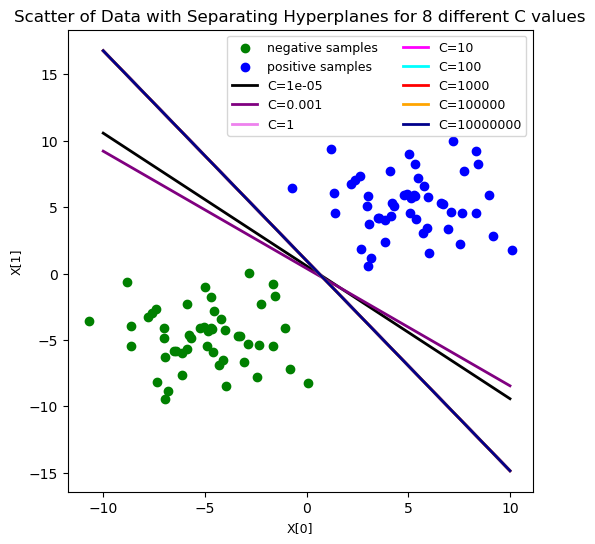

In [9]:
#plot the decision boundaries for the difference C vals

plt.figure(figsize=(6, 6))
colors = ['black', 'purple', 'violet', 'magenta', 'cyan', 'red', 'orange', 'darkblue']
plt.scatter(X[:50, 0], X[:50, 1], color='green', label='negative samples')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', label='positive samples')
for i in range(len(C_range)):
    plt.plot([-10, 10], [-(-10 * ws[i][0] + bs[i]) / ws[i][1], -(10 * ws[i][0] +\
                                                                 bs[i]) / ws[i][1]], \
             color=colors[i], linewidth=2, label='C={}'.format(C_range[i]))
plt.title('Scatter of Data with Separating Hyperplanes for 8 different C values', \
          fontsize=12)
plt.xlabel('X[0]', fontsize=9)
plt.ylabel('X[1]', fontsize=9)
plt.legend(loc='best', ncol=2, fontsize=9)

Text(0, 0.5, 'Number of SVs')

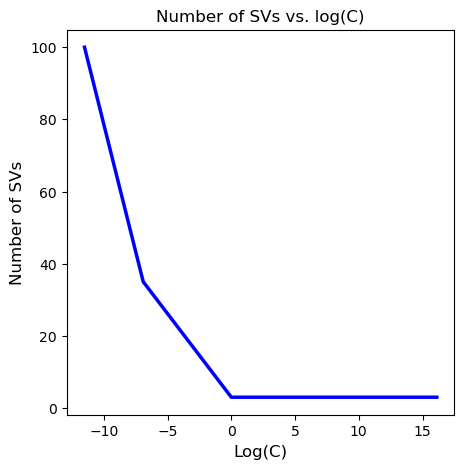

In [13]:
#now plot the #SVs by log(C)
plt.figure(figsize=(5,5))
plt.plot(np.log(C_range), num_sv, color='blue', linewidth=2.5)
plt.title('Number of SVs vs. log(C)', fontsize=12)
plt.xlabel('Log(C)', fontsize=12)
plt.ylabel('Number of SVs', fontsize=12)

Now, let's look at a non-linearly separable case and play around with kernels! We start similarly, generating some toy data as follows: <br/>
• Xneg ∼ N([-5, -5], 25·$I_2$) and corresponds to negative labels (−1) <br/>
• Xpos ∼ N([5, 5], 25·$I_2$) and corresponds to positive labels (+1) <br/>
And, once again, we use libsvm (only with different settings) to fit an SVM to these data and construct contour plots for the decision function f and explicitly plot the decision boundary as well. Finally, let's look at how these countour plots as well as the number of SVs change as we vary the $\sigma^2$ in our kernel.

****************************************
Train accuracy is: 93.704
Test accuracy is: 90.000
****************************************


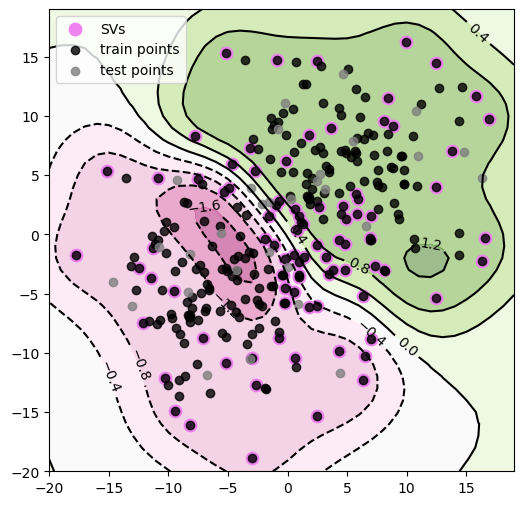

In [19]:
#gen data
X_neg = multivariate_normal.rvs(mean=[-5, -5], cov=(25*np.eye(2)), \
                                  size=150, random_state=np.random.seed(0))
X_pos = multivariate_normal.rvs(mean=[5, 5], cov=(25*np.eye(2)), \
                                  size=150, random_state=np.random.seed(0))

X = np.concatenate([X_neg, X_pos], axis=0)
neg_labels = np.repeat(-1, 150)
pos_labels = np.repeat(1, 150)
Y = np.concatenate([neg_labels, pos_labels], axis=0)

#split it into train/test
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.10, random_state=5)

#fit model (with \gamma = 1/\sigma^2 = 1/25)
prob = svm_problem(y_tr, X_tr)
options = svm_parameter('-s 0 -t 2 -g 0.04 -q') #Gaussian kernel, C type, gamma=1/25  
model = svm_train(prob, options)


#Get SVs 
SVs = X_tr[np.array(model.get_sv_indices()) - 1]
#prep stuff we need for 2D contour plots 
x_min, x_max = -20, 20
y_min, y_max = -20, 20
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

Z = []
for i in range(xx.shape[0]):
    curr_z_row = []
    for j in range(yy.shape[0]):
        item = np.array([xx[i, j], yy[i,j]])
        item = np.expand_dims(item, axis=0)
        z_ij = svm_predict([], item, model, '-q')
        curr_z_row.append(z_ij[2][0])
    Z.append(np.array(curr_z_row))
Z = np.squeeze(np.array(Z))
#construct plots 
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.PiYG, alpha=0.5) 
CS = plt.contour(xx, yy, Z, colors='black') 
plt.clabel(CS, inline=1, fontsize=10) 
plt.scatter(SVs[:, 0], SVs[:, 1], color='violet', label='SVs', s=80) 
plt.scatter(X_tr[:, 0], X_tr[:, 1], color='black', alpha = 0.8, label='train points')
plt.scatter(X_te[:, 0], X_te[:, 1], color='gray', alpha = 0.8,label='test points')
plt.legend(loc='best')

#report train/test set accuracies 
pred_tr = svm_predict(y_tr, X_tr, model, '-q')
tr_acc = pred_tr[1][0]

pred_te = svm_predict(y_te, X_te, model, '-q')
te_acc = pred_te[1][0]

print('*'*40)
print('Train accuracy is: {:.3f}'.format(tr_acc))
print('Test accuracy is: {:.3f}'.format(te_acc))
print('*'*40)

In [20]:
#now fit same data using rbf kernel SVM with varying sigmas
#code here could be var more efifcient/pretty
#will clean it up before uploading final version of all materials to website 

#gen sig_sqrds, gammas
sig_sqrds = [1, 2, 4, 8, 32, 128]
gammas = [1/i for i in sig_sqrds]

#def small func to get our Z vals 
def get_Zs(xx, yy, model):
    """
    Constructs 2D Z array to be passed onto contour and contourf for 
    constructing the desired plots. 
    Args: 
    xx: 2D arr output from meshgrid
    yy: 2D arr output from meshgrid
    model: LIBSVM model -- especified using an SVM problem and a set 
    of param options.
    """
    Z = []
    for i in range(xx.shape[0]):
        curr_z_row = []
        for j in range(yy.shape[0]):
            item = np.array([xx[i, j], yy[i,j]])
            item = np.expand_dims(item, axis=0)
            z_ij = svm_predict([], item, model, '-q')
            curr_z_row.append(z_ij[2][0])
        Z.append(np.array(curr_z_row))
    Z = np.squeeze(np.array(Z))
    return Z 

#train/fit models and collect all vars we want 
tr_acc = []
te_acc = []
SVs = []
nsvs = []
Zs = []

for g in gammas: 
    prob = svm_problem(y_tr, X_tr)
    options = svm_parameter('-s 0 -t 2 -g {} -q'.format(g))
    model = svm_train(prob, options)
    nsvs.append(len(model.get_sv_indices()))
    SVs.append(X_tr[np.array(model.get_sv_indices()) - 1])
    pred_tr = svm_predict(y_tr, X_tr, model, '-q')
    tr_acc.append(pred_tr[1][0])
    pred_te = svm_predict(y_te, X_te, model, '-q')
    te_acc.append(pred_te[1][0])
    curr_Z = get_Zs(xx, yy, model)
    Zs.append(curr_Z)

In [48]:
#now construct contourplots, report accuracies
#construct #SVs by \sigma^2 plot.

def construct_countour_plots(xx, yy, Zs, SVs, X_tr, X_te, sigmas):
    """
    Constructs a (2,3) plot mat containing results of above 
    model fittings using 6 different vals for \sigma^2 
    Args
    ----
    xx: 2D arr output from meshgrid
    yy: 2D arr output from meshgrid
    Zs: list containing level set info for plotting.
    SVs: list containing SVs for each sim.
    X_tr: np.arr containing train data
    X_te: np.arr containg test data
    sigmas: options of sigma^2 values tested
    """
    fig, axs = plt.subplots(2,3, figsize=(35, 30))
    for i in range(2):
        for j in range(3):
            idx = i*3 + j
            sig = sigmas[idx]
            axs[i, j].contourf(xx, yy, Zs[idx], cmap=plt.cm.PiYG, alpha=0.5)
            CS = axs[i, j].contour(xx, yy, Zs[idx], colors='black')
            plt.clabel(CS, inline=1, fontsize=18)
            axs[i, j].scatter(SVs[idx][:, 0], SVs[idx][:, 1], \
                              color='purple', label='SVs', s=100)
            axs[i, j].scatter(X_tr[:, 0], X_tr[:, 1], color='black',\
                              alpha = 0.8, label='train points')
            axs[i, j].scatter(X_te[:, 0], X_te[:, 1], color='gray', \
                              alpha = 0.8,label='test points')
            axs[i, j].legend(loc='best', fontsize=16)
            axs[i, j].set_title('Contour plots for sig_sqrd={}'.format(sig), \
                                                                           fontsize=18)
    return

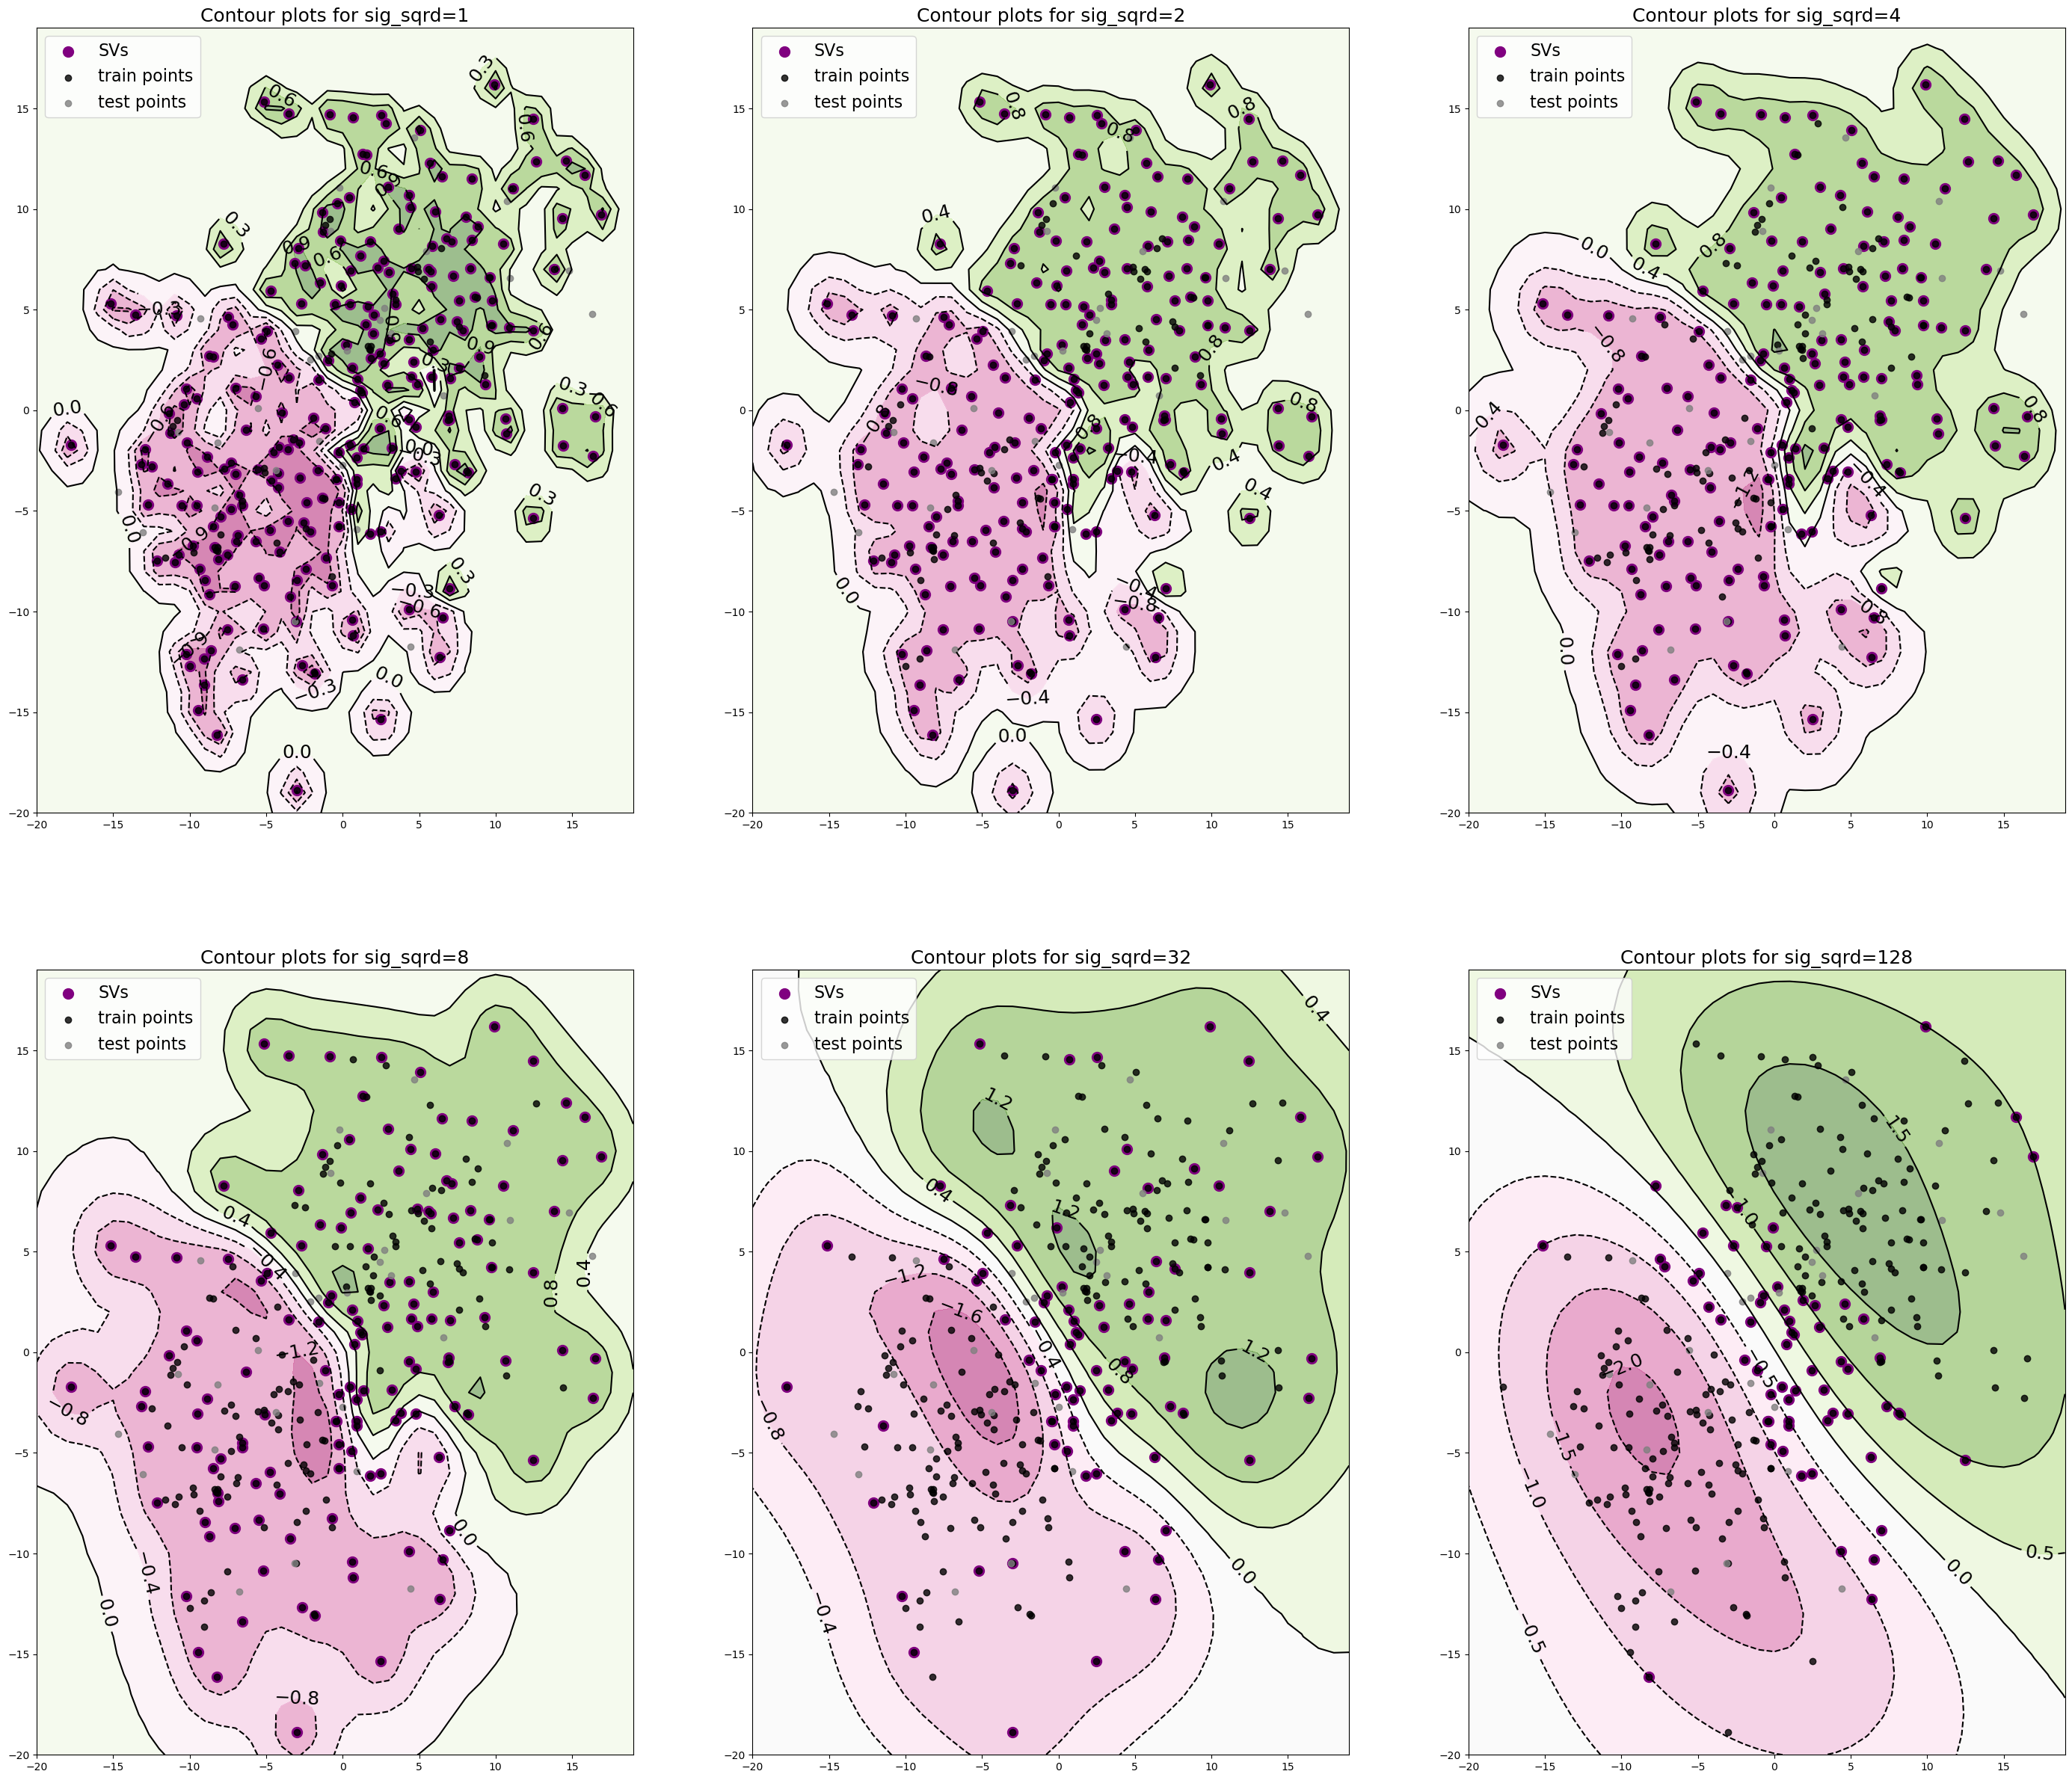

In [49]:
construct_countour_plots(xx, yy, Zs, SVs, X_tr, X_te, sig_sqrds)

****************************************
Train/Test Accuracies for Sig_Sqrd = 1
Train set accuracy:97.4074
Test set accuracy:86.6667
****************************************
****************************************
Train/Test Accuracies for Sig_Sqrd = 2
Train set accuracy:96.2963
Test set accuracy:86.6667
****************************************
****************************************
Train/Test Accuracies for Sig_Sqrd = 4
Train set accuracy:95.1852
Test set accuracy:90.0000
****************************************
****************************************
Train/Test Accuracies for Sig_Sqrd = 8
Train set accuracy:94.4444
Test set accuracy:93.3333
****************************************
****************************************
Train/Test Accuracies for Sig_Sqrd = 32
Train set accuracy:93.7037
Test set accuracy:90.0000
****************************************
****************************************
Train/Test Accuracies for Sig_Sqrd = 128
Train set accuracy:93.3333
Test set accuracy:90

Text(0.5, 1.0, '#SVs by Log($\\sigma^2$)')

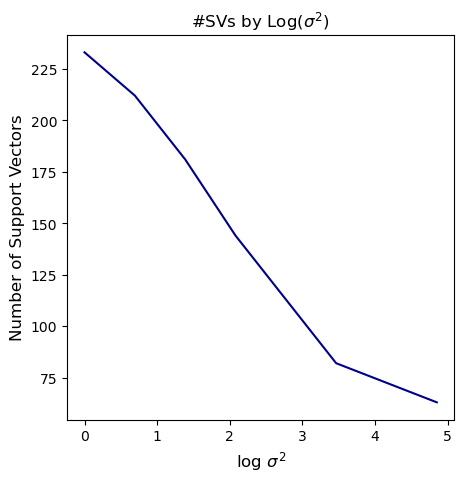

In [51]:
#now report accuracies 
#and plot #SVs by sig
for s in range(len(sig_sqrds)):
    print('*'*40)
    print('Train/Test Accuracies for Sig_Sqrd = {}'.format(sig_sqrds[s]))
    print('Train set accuracy:{:.4f}'.format(tr_acc[s]))
    print('Test set accuracy:{:.4f}'.format(te_acc[s]))
    print('*'*40)
    
plt.figure(figsize=(5, 5))
plt.plot(np.log(sig_sqrds), nsvs, color='darkblue')
plt.xlabel('log $\sigma^2$', fontsize=12)
plt.ylabel('Number of Support Vectors',  fontsize=12)
plt.title('#SVs by Log($\sigma^2$)',  fontsize=12)